# Python Data Transformation


## Begin by importing `pandas` and the data

Using the pandas function `pd.read_csv()` bring in the data from the following link:

**NEED NEW LINK WHEN MOVED TO PERMANENT LOCATION - i.e. NOT /PYTHON/REVAMP/**

**GET PEOPLE TO DOWNLOAD THE DATA, SAVE IT SOMEWHERE ON THEIR COMPUTER AND ACCESS IT ACCORDINGLY.**

https://raw.githubusercontent.com/uqlibrary/technology-training/master/Python/revamp/Global%20YouTube%20Statistics.csv

In [2]:
import pandas as pd

df_raw = pd.read_csv("https://raw.githubusercontent.com/uqlibrary/technology-training/master/Python/revamp/Global_YouTube_Statistics.csv")

In [4]:
df = df_raw.copy()

## Basic exploration

We can see the first $n$ rows with `df.head(n)`:

In [5]:
df.head()
df.head(2)

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891


And the last $n$ rows with `df.tail(n)`:

In [6]:
df.tail()
df.tail(2)

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
993,994,RobTopGames,12300000,3.741235e+08,Gaming,RobTopGames,39,Sweden,SE,Games,...,100000.0,2012.0,May,9.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501
994,995,Make Joke Of,12300000,2.129774e+09,Comedy,Make Joke Of,62,India,IN,Comedy,...,100000.0,2017.0,Aug,1.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


The column names with

In [7]:
df.columns

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country', 'Abbreviation', 'channel_type',
       'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'created_year', 'created_month', 'created_date',
       'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'],
      dtype='object')

And the 'shape' (rows, columns) of the data:

In [8]:
df.shape

(995, 28)

### Challenge

How might we find the total number of cells / data entries using `df.shape`? 

> Remember, to access one of the numbers in a list (or here, a tuple) we need to *index*: `mylist[5]` will access the sixth element of `mylist`, counting from 0.

In [9]:
# Solution

N_cells = df.shape[0] * df.shape[1]

print(f"There are {N_cells} cells in this dataframe.")

There are 27860 cells in this dataframe.


## Accessing data

How do we access individual rows or columns? A few methods. [A comprehensive guide is available](https://pandas.pydata.org/docs/user_guide/indexing.html)

### Accessing columns
Index with the column names. For example, to get the "Country" column,

In [10]:
df["Country"]

0               India
1       United States
2       United States
3       United States
4               India
            ...      
990            Brazil
991             India
992    United Kingdom
993            Sweden
994             India
Name: Country, Length: 995, dtype: object

Or multiple with a list of names:

In [11]:
# Save the names in a list and then index
col_names = ["Youtuber", "Country"]
df[col_names]

# This is equivalent to
df[["Youtuber", "Country"]]

,Youtuber,Country
0,T-Series,India
1,YouTube Movies,United States
2,MrBeast,United States
3,Cocomelon - Nursery Rhymes,United States
4,SET India,India
...,...,...
990,Natan por A�,Brazil
991,Free Fire India Official,India
992,Panda,United Kingdom
993,RobTopGames,Sweden


These are all dataframes themselves, and operate like `df`. For example,

In [12]:
df[["Youtuber", "Country"]].columns

Index(['Youtuber', 'Country'], dtype='object')

### Accessing rows

The easiest way to get a selection of rows is by *slicing* with `df[start_row : end_row]`. Note that the last row is **not included**.


In [13]:
df[20:25]

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
20,21,HYBE LABELS,71300000,2.863457e+10,Music,HYBE LABELS,1337,South Korea,KR,Music,...,900000.0,2008.0,Jun,4.0,94.3,5.170910e+07,4.15,42106719.0,35.907757,127.766922
21,22,Zee TV,70500000,7.313905e+10,Entertainment,Zee TV,129204,India,IN,Entertainment,...,900000.0,2005.0,Dec,11.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
22,23,Pinkfong Baby Shark - Kids' Songs & Stories,68200000,3.884323e+10,Education,Pinkfong Baby Shark - Kids' Songs & Stories,2865,United States,US,Education,...,600000.0,2011.0,Dec,14.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
23,24,Canal KondZilla,66500000,3.677559e+10,Music,Canal KondZilla,2572,Brazil,BR,Music,...,NaN,2012.0,Mar,21.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280
24,25,ChuChu TV Nursery Rhymes & Kids Songs,65900000,4.575785e+10,Education,ChuChu TV Nursery Rhymes & Kids Songs,633,India,IN,Education,...,500000.0,2013.0,Feb,9.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


If you just want to get one row, we need to use `df.loc[]` or `df.iloc[]` (standing for .location and .indexlocation respectively). These let you access via the row label (for `.loc[]`) or row number (for `.iloc[]`). The labels always look like the first column, here they're the bold numbers **0**, **1**, **2** **...** **994**, but they **could be anything**. The row number is always a number.

In [14]:
df.loc[20]

rank                                                  21
Youtuber                                     HYBE LABELS
subscribers                                     71300000
video views                                28634566938.0
category                                           Music
Title                                        HYBE LABELS
uploads                                             1337
Country                                      South Korea
Abbreviation                                          KR
channel_type                                       Music
video_views_rank                                    46.0
country_rank                                         3.0
channel_type_rank                                    5.0
video_views_for_the_last_30_days             598173000.0
lowest_monthly_earnings                         149500.0
highest_monthly_earnings                       2400000.0
lowest_yearly_earnings                         1800000.0
highest_yearly_earnings        

#### Accessing rows by a condition

Finally, it's often useful to subset based on a certain condition. We put the condition in the index, usually based on a specific column. Here, we only select rows where the values in the column column `df["subscribers"]` are greater than 100 million:

In [15]:
df[df["subscribers"] > 1e8]

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
5,6,Music,119000000,0.000000e+00,NaN,Music,0,NaN,NaN,Music,...,NaN,2013.0,Sep,24.0,NaN,NaN,NaN,NaN,NaN,NaN
6,7,��� Kids Diana Show,112000000,9.324704e+10,People & Blogs,��� Kids Diana Show,1111,United States,US,Entertainment,...,NaN,2015.0,May,12.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
7,8,PewDiePie,111000000,2.905804e+10,Gaming,PewDiePie,4716,Japan,JP,Entertainment,...,NaN,2010.0,Apr,29.0,63.2,1.262266e+08,2.29,115782416.0,36.204824,138.252924
8,9,Like Nastya,106000000,9.047906e+10,People & Blogs,Like Nastya Vlog,493,Russia,RU,People,...,100000.0,2016.0,Jan,14.0,81.9,1.443735e+08,4.59,107683889.0,61.524010,105.318756


## Cleaning the data

This dataset has a lot of columns, most of which we won't be using today. Often, the first task in data analysis is cleaning unnecessary variables and observations from the data.

We use the tools from before but reassign our dataframe

Let's first make a backup of our dataframe, which we can restore if things go wrong

We can choose to remove certain columns with self-assignment:

In [16]:
cols_to_keep = ["rank", "Youtuber", "category"]
df = df[cols_to_keep]
df

,rank,Youtuber,category
0,1,T-Series,Music
1,2,YouTube Movies,Film & Animation
2,3,MrBeast,Entertainment
3,4,Cocomelon - Nursery Rhymes,Education
4,5,SET India,Shows
...,...,...,...
990,991,Natan por A�,Sports
991,992,Free Fire India Official,People & Blogs
992,993,Panda,NaN
993,994,RobTopGames,Gaming


Similarly, we can choose to only keep specific rows by subsetting with a condition

In [17]:
df = df[df["category"] == "Music"]
df

,rank,Youtuber,category
0,1,T-Series,Music
10,11,Zee Music Company,Music
17,18,BANGTANTV,Music
19,20,Justin Bieber,Music
20,21,HYBE LABELS,Music
...,...,...,...
965,966,Mundo Bita,Music
966,967,Wave Music Bhakti,Music
982,983,DisneyChannelUK,Music
987,988,Avril Lavigne,Music


Here, we've reduced our dataset to three columns and filtered to only keep the *Music* category.

### Challenge

Let's clean our data for analysis later on. Firstly, we need to reset the dataframe back to the original, since we've reduced it too much!

In [18]:
df = df_raw.copy()

Your challenge is to reduce the data by the following specifications:

- Only include the following categories
    - rank
    - Youtuber
    - subscribers
    - video views
    - category
    - Country
    - subscribers_for_last_30_days
- Only include YouTubers ranked in the top 50.

Once you've done this, notice that "nan" is one of the values for the categories

> `df["category"].unique()` lists all the unique entries in the "category" column

In [19]:
df["category"].unique()

array(['Music', 'Film & Animation', 'Entertainment', 'Education', 'Shows',
       nan, 'People & Blogs', 'Gaming', 'Sports', 'Howto & Style',
       'News & Politics', 'Comedy', 'Trailers', 'Nonprofits & Activism',
       'Science & Technology', 'Movies', 'Pets & Animals',
       'Autos & Vehicles', 'Travel & Events'], dtype=object)

Let's remove those using a special logical test, `pd.isna("category")`. This performs what ~`df["category"] == nan`~ *should*. You'll want to subset using this test.

In [20]:
# Solution

# Remove most columns
cols_to_keep = ["rank", "Youtuber", "subscribers", "video views", "category", "Country", "subscribers_for_last_30_days"]
df = df[cols_to_keep]

# Remove all rows except top 50 YouTubers
df = df[df["rank"] <= 50]

# Remove the nan categories
df = df[pd.notna(df["category"])]


## Adding and Editing Columns
To change the values in a column, it's as simple as

```python
df["column name"] = # new value
```

For example, if I wanted to replace every category with "video", I could use

In [32]:
# Create a copy so that we don't lose df
df_new = df.copy()

# Repalce values in "category" column with "video"
df_new["category"] = "video"

df_new.head(10)

,rank,Youtuber,subscribers,video views,category,Country,subscribers_for_last_30_days,views_in_billions
0,1,T-Series,245000000,2.280000e+11,video,India,2000000.0,228.0
1,2,YouTube Movies,170000000,0.000000e+00,video,United States,NaN,0.0
2,3,MrBeast,166000000,2.836884e+10,video,United States,8000000.0,28.0
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,video,United States,1000000.0,164.0
4,5,SET India,159000000,1.480000e+11,video,India,1000000.0,148.0
6,7,��� Kids Diana Show,112000000,9.324704e+10,video,United States,NaN,93.0
7,8,PewDiePie,111000000,2.905804e+10,video,Japan,NaN,29.0
8,9,Like Nastya,106000000,9.047906e+10,video,Russia,100000.0,90.0
9,10,Vlad and Niki,98900000,7.718017e+10,video,United States,600000.0,77.0
10,11,Zee Music Company,96700000,5.785629e+10,video,India,1100000.0,58.0


I could alternatively provide a whole column for the value (instead of "video):

In [86]:
# Replace the values in "Country" with the values in "category"
df_new["Country"] = df_new["category"]

### Adding columns

We can add columns in a similar way, we just need to give an unused name:

In [33]:
df["new_col"] = df["subscribers"]
df.head(10)

,rank,Youtuber,subscribers,video views,category,Country,subscribers_for_last_30_days,views_in_billions,new_col
0,1,T-Series,245000000,2.280000e+11,Music,India,2000000.0,228.0,245000000
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,United States,NaN,0.0,170000000
2,3,MrBeast,166000000,2.836884e+10,Entertainment,United States,8000000.0,28.0,166000000
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,United States,1000000.0,164.0,162000000
4,5,SET India,159000000,1.480000e+11,Shows,India,1000000.0,148.0,159000000
6,7,��� Kids Diana Show,112000000,9.324704e+10,People & Blogs,United States,NaN,93.0,112000000
7,8,PewDiePie,111000000,2.905804e+10,Gaming,Japan,NaN,29.0,111000000
8,9,Like Nastya,106000000,9.047906e+10,People & Blogs,Russia,100000.0,90.0,106000000
9,10,Vlad and Niki,98900000,7.718017e+10,Entertainment,United States,600000.0,77.0,98900000
10,11,Zee Music Company,96700000,5.785629e+10,Music,India,1100000.0,58.0,96700000


We can also perform mathematical operations on them

In [34]:
df["views_in_billions"] = round(df["video views"] / 1e9)
df.head(10)

,rank,Youtuber,subscribers,video views,category,Country,subscribers_for_last_30_days,views_in_billions,new_col
0,1,T-Series,245000000,2.280000e+11,Music,India,2000000.0,228.0,245000000
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,United States,NaN,0.0,170000000
2,3,MrBeast,166000000,2.836884e+10,Entertainment,United States,8000000.0,28.0,166000000
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,United States,1000000.0,164.0,162000000
4,5,SET India,159000000,1.480000e+11,Shows,India,1000000.0,148.0,159000000
6,7,��� Kids Diana Show,112000000,9.324704e+10,People & Blogs,United States,NaN,93.0,112000000
7,8,PewDiePie,111000000,2.905804e+10,Gaming,Japan,NaN,29.0,111000000
8,9,Like Nastya,106000000,9.047906e+10,People & Blogs,Russia,100000.0,90.0,106000000
9,10,Vlad and Niki,98900000,7.718017e+10,Entertainment,United States,600000.0,77.0,98900000
10,11,Zee Music Company,96700000,5.785629e+10,Music,India,1100000.0,58.0,96700000


#### Removing columns

A quick way to remove a column is with the `df.drop()` or `df.pop()` methods. Notice that `df.pop()` will display whatever was removed, while the other won't.

In [35]:
df.drop(columns = "new_col")
df.pop("views_in_billions").head(10)

0     228.0
1       0.0
2      28.0
3     164.0
4     148.0
6      93.0
7      29.0
8      90.0
9      77.0
10     58.0
Name: views_in_billions, dtype: float64

### Challenge

Create a new column called "%_new_subs" which stores the ratio of new subscribers (in "subscribers_for_last_30_days") and current subscribers (in "subscribers")

Once you've done this, try rounding it to two decimal places with `round()`.

In [36]:
# Solution

df["%_new_subs"] = round(100 * df["subscribers_for_last_30_days"] / (df["subscribers"]), 2)
df.head(10)

,rank,Youtuber,subscribers,video views,category,Country,subscribers_for_last_30_days,new_col,%_new_subs
0,1,T-Series,245000000,2.280000e+11,Music,India,2000000.0,245000000,0.82
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,United States,NaN,170000000,NaN
2,3,MrBeast,166000000,2.836884e+10,Entertainment,United States,8000000.0,166000000,4.82
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,United States,1000000.0,162000000,0.62
4,5,SET India,159000000,1.480000e+11,Shows,India,1000000.0,159000000,0.63
6,7,��� Kids Diana Show,112000000,9.324704e+10,People & Blogs,United States,NaN,112000000,NaN
7,8,PewDiePie,111000000,2.905804e+10,Gaming,Japan,NaN,111000000,NaN
8,9,Like Nastya,106000000,9.047906e+10,People & Blogs,Russia,100000.0,106000000,0.09
9,10,Vlad and Niki,98900000,7.718017e+10,Entertainment,United States,600000.0,98900000,0.61
10,11,Zee Music Company,96700000,5.785629e+10,Music,India,1100000.0,96700000,1.14


Technically, it would be better to take the percentage from the total number of subscribers before the new ones joined. For this, we need to subtract the new subscribers from the current count:

In [37]:
# Solution

df["%_new_subs"] = round(100 * df["subscribers_for_last_30_days"] / (df["subscribers"] - df["subscribers_for_last_30_days"]), 2)
df.head(10)

,rank,Youtuber,subscribers,video views,category,Country,subscribers_for_last_30_days,new_col,%_new_subs
0,1,T-Series,245000000,2.280000e+11,Music,India,2000000.0,245000000,0.82
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,United States,NaN,170000000,NaN
2,3,MrBeast,166000000,2.836884e+10,Entertainment,United States,8000000.0,166000000,5.06
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,United States,1000000.0,162000000,0.62
4,5,SET India,159000000,1.480000e+11,Shows,India,1000000.0,159000000,0.63
6,7,��� Kids Diana Show,112000000,9.324704e+10,People & Blogs,United States,NaN,112000000,NaN
7,8,PewDiePie,111000000,2.905804e+10,Gaming,Japan,NaN,111000000,NaN
8,9,Like Nastya,106000000,9.047906e+10,People & Blogs,Russia,100000.0,106000000,0.09
9,10,Vlad and Niki,98900000,7.718017e+10,Entertainment,United States,600000.0,98900000,0.61
10,11,Zee Music Company,96700000,5.785629e+10,Music,India,1100000.0,96700000,1.15


## Interpreting Documentation

We're going to take a brief interlude from coding to examine documentation. Python is popular because it is versatile, and it's versatility has allowed hundreds of thousands of programmers to write shareable code in the form of **packages**.

### Intepreting the `pandas.unique()` documentation

The `pandas` documentation is hosted at [https://pandas.pydata.org/pandas-docs/version/2.1/reference/index.html](https://pandas.pydata.org/pandas-docs/version/2.1/reference/index.html). 

To begin with, let's look at interpreting a simple, general function. Go to [*General functions* > *pandas.unique*](https://pandas.pydata.org/pandas-docs/version/2.1/reference/api/pandas.unique.html)

||||
| --- | --- | --- |
| **Signature** | 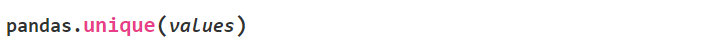 | The signature tells us how to use the function. Here, we need to write `pd.unique( ... )` (remember we use `import pandas as pd`) and put `values` as the *argument* (input). See parameters for what `values` should be.|
| **Description** | 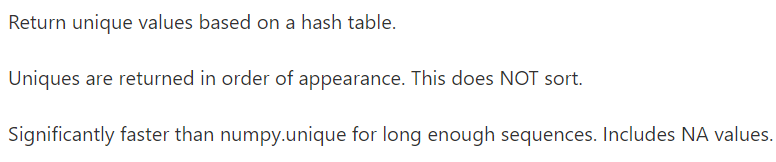 | Next, we have a general description of how the function works. Don't worry if you don't understand some of the references (e.g. hash tables). |
| **Parameters** | 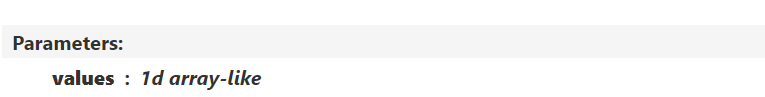 | The **parameters** section tells us what *values* is. It's described as 1d array-like, which just means a 1D dataset, like a list, tuple, numpy array or pandas series.
| **Returns** | 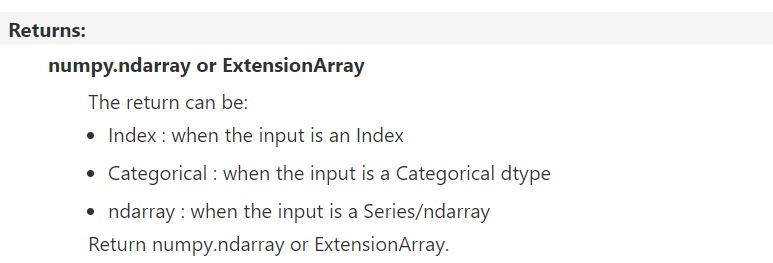 | We see what type of object is returned, either a [numpy array](https://numpy.org/doc/stable/reference/generated/numpy.array.html) (a list of numbers for mathematics, i.e. a vector) or ExtensionArray (specified in the bullet points).
| **Examples** | 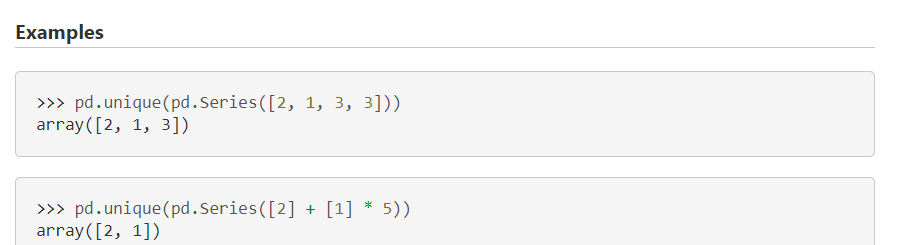 | Finally, and perhaps most helpfully, there is a list of examples. |

> **Everything in pandas has documentation in this format**. The more you use it, the more intuitive it becomes

We can now use this function to determine the unique set of values in a given list. Let's try it:

In [92]:
myList = [0,1,2,3,4]
pd.unique(myList)

C:\Users\uqcwest5\AppData\Local\Temp\ipykernel_28508\1134000238.py:2: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  pd.unique(myList)


array([0, 1, 2, 3, 4])

### Challenge

How might we use this function, `pd.unique`, to find the unique values in the "category" column of our datasest?

In [93]:
# Solution
pd.unique(df["category"])

array(['Music', 'Film & Animation', 'Entertainment', 'Education', 'Shows',
       'People & Blogs', 'Gaming', 'Sports', 'Howto & Style',
       'News & Politics'], dtype=object)

### Methods

The function `pd.unique` lives in the top level of `pandas` - we only need to use `.` once, and we use it to access directly from `pd`. 

You may remember that we used something like this before, in the data cleaning challenge. We used
```python
df["category"].unique()
```
to get the unique values in the column *category*.

This seems to achieve the same outcome, so what's the difference? Looking at them side by side,

1. `pd.unique(df["category"])`
1. `df["category"].unique()`

we see that

1. `pd.unique(...)` lives inside `pd`
1. `df[...].unique()` lives inside `df[...]`

> How do we know? Because of the operator `.` - for example, `a.b` looks inside `a` for the value `b`

So, 
1. In the first case, the function `unique()` lives in the top level of pandas.
2. In the second, the *method* `unique()` lives inside the Series (dataframe column).

**They are defined separately**. Because they live in different places, it's never ambiguous which one is called. We call functions that live within variables *methods*, and variables that live within variables *attributes*. Technically, they live within a more abstract data structure called a *class*; all specific dataframes (like `df`) are instances of a general *class* called `DataFrame`. Objects of the same class share methods and attributes.

#### Where can I find the documentation?

The documentation for methods like `df[...].unique()` is located beneath the class. `df` has the DataFrame class, and its columns have the Series class. So 

- The documentation for `df[...].unique()` will be found under `pd.Series.unique` (as will other column methods), and
- The documentation for all dataframe methods (e.g. `df.copy()`) are found under `pd.DataFrame.method_name`

### Challenge

Option 1 seems the most useful but hardest, option 3 the easiest, option 2 the worst

Maybe offer both? Below is description for option 1:

Go to [*Series > pandas.Series.mask*](https://pandas.pydata.org/docs/reference/api/pandas.Series.mask.html)

Read the documentation on the `.mask` method. Essentially, it replaces values based on a certain condition.

**Challenge:** replace the values "United States" in the Country column with "USA" using `.mask`

> **Notes**
> - To use the method, try `df["Country"].mask(...)`
> - The condition in `cond` could be something like `df["subscribers"] < 100000000`


In [38]:
# Option 1: mask
df["Country"].mask(df["Country"] == "United States", "USA", inplace = True)
df.head(10)

,rank,Youtuber,subscribers,video views,category,Country,subscribers_for_last_30_days,new_col,%_new_subs
0,1,T-Series,245000000,2.280000e+11,Music,India,2000000.0,245000000,0.82
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,USA,NaN,170000000,NaN
2,3,MrBeast,166000000,2.836884e+10,Entertainment,USA,8000000.0,166000000,5.06
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,USA,1000000.0,162000000,0.62
4,5,SET India,159000000,1.480000e+11,Shows,India,1000000.0,159000000,0.63
6,7,��� Kids Diana Show,112000000,9.324704e+10,People & Blogs,USA,NaN,112000000,NaN
7,8,PewDiePie,111000000,2.905804e+10,Gaming,Japan,NaN,111000000,NaN
8,9,Like Nastya,106000000,9.047906e+10,People & Blogs,Russia,100000.0,106000000,0.09
9,10,Vlad and Niki,98900000,7.718017e+10,Entertainment,USA,600000.0,98900000,0.61
10,11,Zee Music Company,96700000,5.785629e+10,Music,India,1100000.0,96700000,1.15


In [106]:
# Option 2: apply
df["video views"].apply("sum")

2194689270587.0

In [120]:
# Option 3: describe
df.describe(percentiles = [0.01,0.99])

,rank,subscribers,video views,subscribers_for_last_30_days,new_col,%_new_subs
count,47.000000,4.700000e+01,4.700000e+01,3.900000e+01,4.700000e+01,39.000000
mean,26.319149,7.922340e+07,4.669552e+10,7.666686e+05,7.922340e+07,0.916154
std,14.597657,4.082052e+07,4.261643e+10,1.264147e+06,4.082052e+07,0.891095
min,1.000000,4.660000e+07,0.000000e+00,7.500000e+01,4.660000e+07,0.000000
1%,1.460000,4.669200e+07,4.543588e+09,3.804650e+04,4.669200e+07,0.034200
50%,27.000000,6.460000e+07,3.051617e+10,5.000000e+05,6.460000e+07,0.790000
99%,49.540000,2.105000e+08,1.985600e+11,5.720000e+06,2.105000e+08,4.311400
max,50.000000,2.450000e+08,2.280000e+11,8.000000e+06,2.450000e+08,5.060000


In [121]:
df.T

,0,1,2,3,4,6,7,8,9,10,...,40,41,42,43,44,45,46,47,48,49
rank,1,2,3,4,5,7,8,9,10,11,...,41,42,43,44,45,46,47,48,49,50
Youtuber,T-Series,YouTube Movies,MrBeast,Cocomelon - Nursery Rhymes,SET India,��� Kids Diana Show,PewDiePie,Like Nastya,Vlad and Niki,Zee Music Company,...,Infobells - Hindi,Taylor Swift,Ariana Grande,BillionSurpriseToys - Nursery Rhymes & Cartoons,JuegaGerman,Billie Eilish,Get Movies,Shemaroo,Badabun,SonyMusicIndiaVEVO
subscribers,245000000,170000000,166000000,162000000,159000000,112000000,111000000,106000000,98900000,96700000,...,53300000,52900000,52700000,52200000,48100000,47900000,47500000,47400000,46800000,46600000
video views,228000000000.0,0.0,28368841870.0,164000000000.0,148000000000.0,93247040539.0,29058044447.0,90479060027.0,77180169894.0,57856289381.0,...,30516172739.0,29884657286.0,24004842608.0,9877365274.0,14631710289.0,13626331061.0,30788679536.0,22519705183.0,19398045702.0,27286058807.0
category,Music,Film & Animation,Entertainment,Education,Shows,People & Blogs,Gaming,People & Blogs,Entertainment,Music,...,Education,Music,Music,Education,Gaming,Music,Entertainment,Entertainment,Entertainment,Music
Country,India,USA,USA,USA,India,USA,Japan,Russia,USA,India,...,India,USA,USA,USA,Chile,USA,Russia,India,NaN,USA
subscribers_for_last_30_days,2000000.0,NaN,8000000.0,1000000.0,1000000.0,NaN,NaN,100000.0,600000.0,1100000.0,...,1600000.0,800000.0,100000.0,600000.0,200000.0,200000.0,700000.0,500000.0,75.0,400000.0
new_col,245000000,170000000,166000000,162000000,159000000,112000000,111000000,106000000,98900000,96700000,...,53300000,52900000,52700000,52200000,48100000,47900000,47500000,47400000,46800000,46600000
%_new_subs,0.82,NaN,5.06,0.62,0.63,NaN,NaN,0.09,0.61,1.15,...,3.09,1.54,0.19,1.16,0.42,0.42,1.5,1.07,0.0,0.87


## Merging

## Grouping, aggregating and summarising

## Exporting data

## Archive

### Advanced - A note on classes
Documentation is hard to read because it assumes you have a comprehensive understanding of Python data structures. One (*the most?*) important structure is the **class**. The Python documentation provides a [comprehensive overview](https://docs.python.org/3/tutorial/classes.html) (if gritty), here we have a brief description.

**What is a class**

In the world, we have abstract forms for specific objects. For example, a **table** is an abstract form, and they all have $n$ legs. Some have $n = 4$ legs, others have $n = 3$, and you might even find some with $n = 0$.

Here, we have an abstract form (table) with specific properties (number of legs) common to all different instances of the form (e.g. my dinner table). We can always describe how many legs a table has. So, we call table a form and n_legs a property of the form.

It's much the same in coding. We call the forms **classes**, which are data containers storing various attributes. We then make specific instances of the class. For example, if I made a **specific** variable called `my_fav_table` and it had the class "table", I could access the number of legs it has with `my_fav_table.n_legs`. These properties are called **attributes**.

Finally, classes can also contain special functions which act on the object and its attributes. These are called **methods**, and we access them with `my_fav_table.method1()`, like we see above.

**Why is this relevant?**

Because most variable 'types' are classes, like DataFrame, and the documentation is structured accordingly. We're currently using the **pandas** package, which has a number of *classes* (e.g. DataFrame) with hundreds of corresponding *methods* (functions) and *attributes* (variables). 

My dataframe, `df`, is an instance of the general class `DataFrame`. Some of the attributes include
```python
df.columns
df.shape
```
and some of the methods include
```python
df.copy()
df.describe()
```
A general familiarity with this will help us read documentation.